 #bovine population
fuente_1 = "https://ec.europa.eu/eurostat/databrowser/view/APRO_MT_LSCATL/default/table?lang=en", "Bovine population"

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
url1 = "data/estat_apro_mt_lscatl$defaultview_filtered_en.csv"
df_1 = pd.read_csv(url1)
df_1.rename(columns={"TIME_PERIOD":"AÑO", "geo": "PAIS"}, inplace=True)

In [35]:
df_1.drop(columns=['DATAFLOW', 'LAST UPDATE', "freq", "unit", "month", "OBS_FLAG", "animals"], inplace=True)

In [32]:
df_1

,PAIS,AÑO,OBS_VALUE
0,Albania,2014,499.69
1,Albania,2015,505.77
2,Albania,2016,496.99
3,Albania,2017,475.22
4,Albania,2018,467.32
...,...,...,...
1954,Kosovo (under United Nations Security Council ...,2017,24.81
1955,Kosovo (under United Nations Security Council ...,2018,24.81
1956,Kosovo (under United Nations Security Council ...,2019,26.15
1957,Kosovo (under United Nations Security Council ...,2020,25.56


In [36]:
df_bovine = pd.pivot_table(df_1, values='OBS_VALUE', index='AÑO', columns='PAIS', aggfunc='sum')

df_bovine

PAIS,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom
AÑO,,,,,,,,,,,,,,,,,,,,,
2013,NaN,3646.77,4366.46,704.0,947.31,824.0,108.35,2412.66,2958.0,456.40,...,2532.25,3168.3,1631.00,830.41,871.24,10672.86,2724.02,NaN,25430.67,17699.0
2014,651.92,3652.46,4456.90,699.0,869.00,793.0,113.46,2509.49,2928.0,464.80,...,2736.90,3248.2,1632.00,817.74,885.84,11428.54,2717.73,NaN,24803.88,17709.0
2015,661.33,3645.65,4493.73,725.0,842.65,825.0,109.82,2482.44,2944.0,449.40,...,2865.76,3303.0,1636.00,808.75,918.60,11618.57,2704.98,2829.33,24558.26,18122.0
2016,649.85,3650.73,4489.87,729.0,872.72,841.0,116.42,2428.72,2933.0,434.10,...,2900.01,3194.1,1585.00,791.46,929.48,11928.79,2715.97,2824.53,24977.08,18145.0
2017,604.95,3629.11,4269.74,708.0,829.12,863.0,124.59,2478.99,2934.0,440.30,...,2955.17,3124.3,1601.00,773.78,914.56,12272.08,2738.07,2824.88,28893.98,18112.0
2018,595.62,3577.63,4310.43,700.0,817.16,816.0,130.56,2476.76,2882.0,442.30,...,2862.46,3053.8,1514.00,768.64,910.97,12345.57,2713.41,2789.98,30771.74,17753.0
2019,518.04,3516.60,4280.58,690.0,785.09,829.0,134.41,2487.89,2823.0,445.60,...,2977.63,2947.3,1568.00,760.09,920.63,12515.04,2649.75,2772.11,31894.19,17514.0
2020,435.53,3467.03,4220.07,686.0,883.50,826.0,150.34,2444.78,2826.0,446.90,...,2999.47,2838.1,1547.00,781.46,925.12,12571.77,2643.21,2766.51,32055.55,NaN
2021,395.64,3513.20,4190.31,NaN,920.94,847.0,153.33,2472.34,2792.0,439.30,...,2910.19,2742.9,1494.00,765.23,926.51,12231.60,2644.21,2800.82,31822.81,NaN


In [37]:
#Eliminamos variables que no nos interesan.
df_bovine.drop(columns=['European Union - 15 countries (1995-2004)', 'European Union - 25 countries (2004-2006)', "Kosovo (under United Nations Security Council Resolution 1244/99)"], inplace=True)


In [38]:
df_bovine.drop(columns=['European Union - 27 countries (from 2020)', 'European Union - 28 countries (2013-2020)'], inplace=True)

In [39]:
df_bovine.drop(columns=['European Union - 27 countries (2007-2013)'], inplace=True)

Una vez creado el df y haberlo limpiado, hacemos una primera grafica y podemos observar una clara diferenciación entre dos grupos de paises. Decimos por ello crear dos sub grupos, los que más cantidad de población bobina y los que menos.

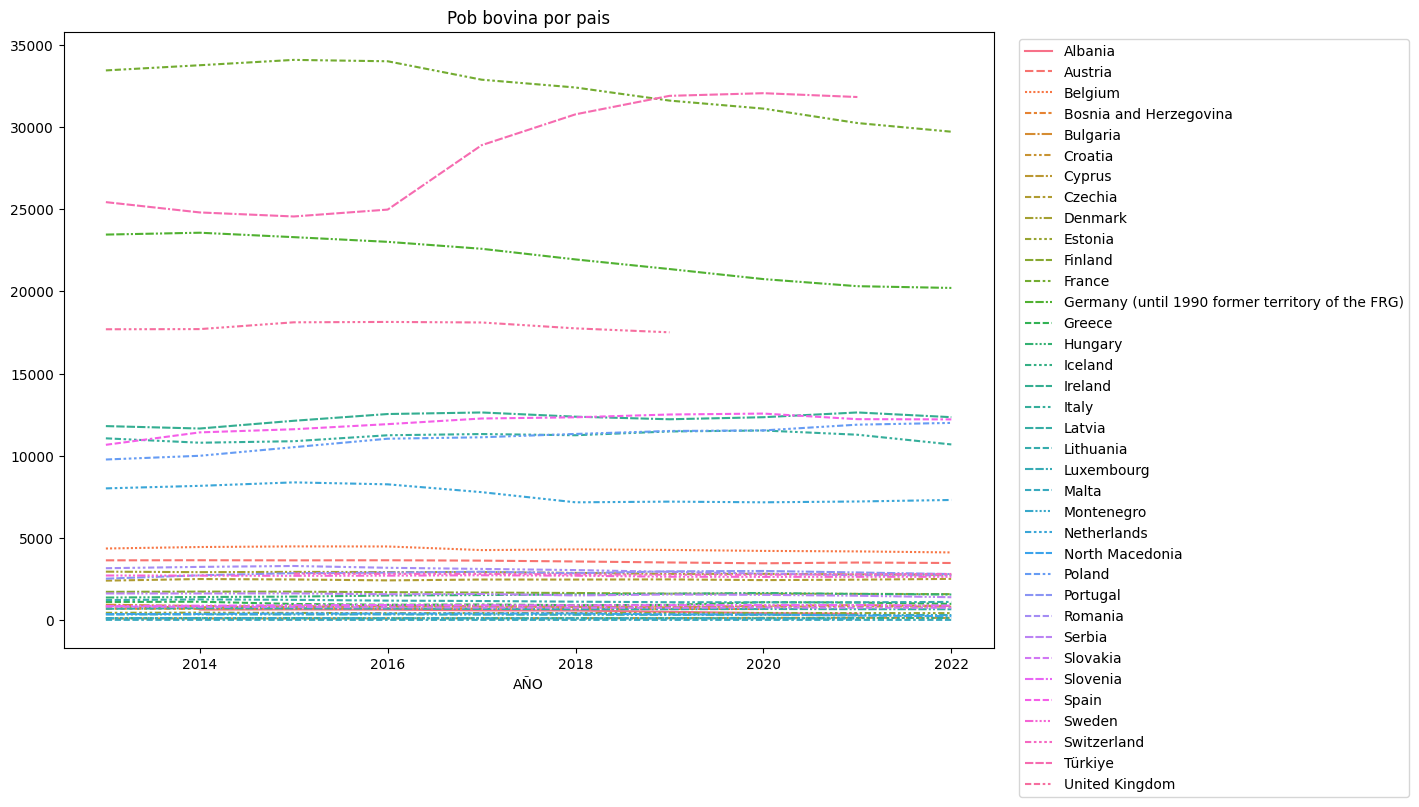

In [48]:
graf3 = plt.figure(figsize=(12,8)) 
sns.lineplot(data = df_bovine)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Pob bovina por pais")
graf3.savefig('Graficos\POb_Bovina_Paises.png', bbox_inches='tight')

In [49]:
pobBAJA = df_bovine[[  "Czechia", "Denmark",	"Finland", "Slovenia", "Slovakia", "Greece", "Hungary", "Bulgaria", "Croatia", "Cyprus", "Estonia", "Iceland", "Latvia", "Luxembourg", "Malta"]].copy()

In [50]:
#Cogemos las columnas para hacer el mismo filtrado en todos
pobBAJA.columns

Index(['Czechia', 'Denmark', 'Finland', 'Slovenia', 'Slovakia', 'Greece',
       'Hungary', 'Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'Iceland',
       'Latvia', 'Luxembourg', 'Malta'],
      dtype='object', name='PAIS')

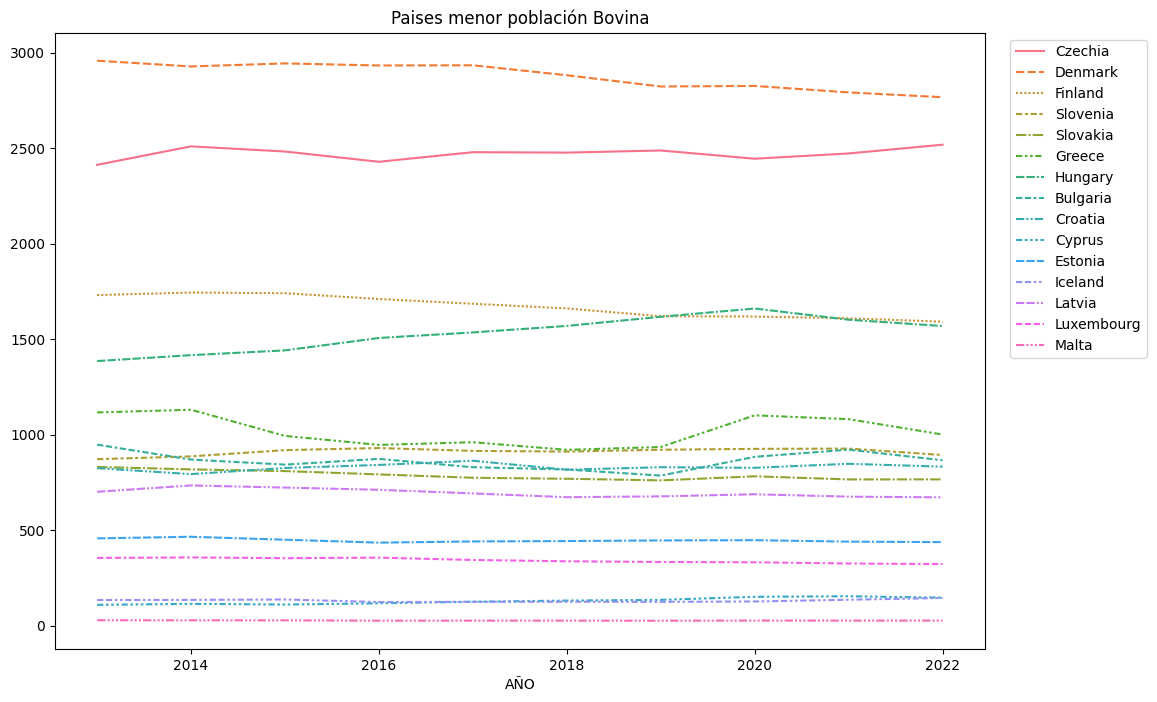

In [51]:
graf2 = plt.figure(figsize=(12,8)) 
sns.lineplot(data = pobBAJA)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Paises menor población Bovina")
graf2.savefig('Graficos\POb_BAJA_Bovina.png', bbox_inches='tight')

In [52]:
#Creamos grupo pob alta
pobALTA= df_bovine.copy()
pobALTA.drop(columns = ["Czechia", "Denmark",	"Finland", "Slovenia", "Slovakia", "Greece", "Hungary", "Bulgaria", "Croatia", "Cyprus", "Estonia", "Iceland", "Latvia", "Luxembourg", "Malta", 'Albania', 'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia', 'Serbia', 'Türkiye', 'United Kingdom'], inplace=True)


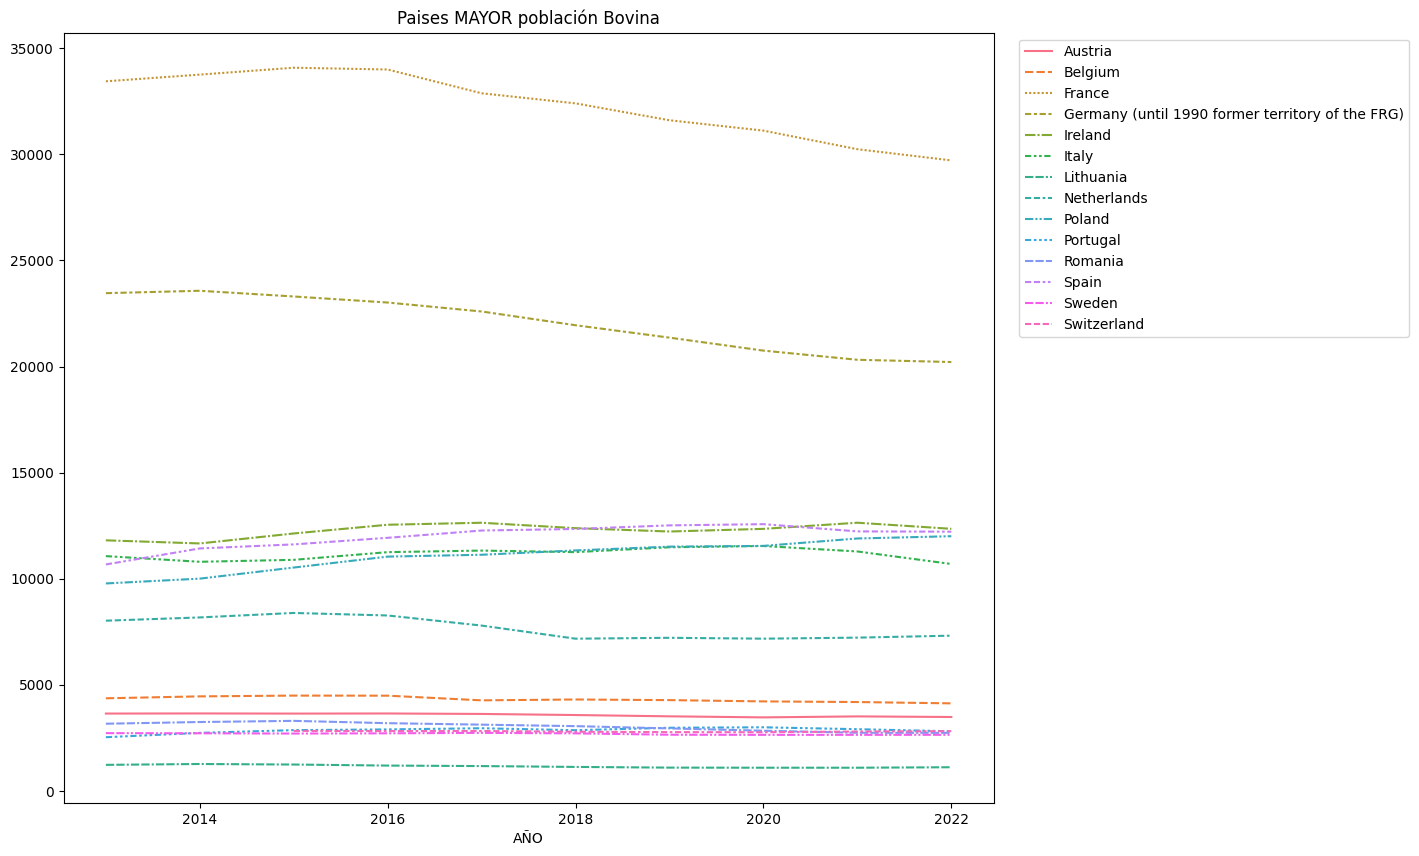

In [57]:
graf6 = plt.figure(figsize=(12,10))
sns.lineplot(data = pobALTA)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');
plt.title("Paises MAYOR población Bovina")
graf6.savefig('Graficos\POb_ALTA_Bovina.png', bbox_inches='tight')

Debido a la salida de Uk de la UE no tenemos datos a partir de 2019, pero decidimos mantenerlo en el dataset igualmente y contrastar sus emisiones hasta dicha fecha.

# PAISES TOP 5

In [81]:
#escogemos los 5 paises con mas pob ganadera y hacemos graficos comparativos con ellos.

top5 = pobALTA[pobALTA.columns[pobALTA.mean() > 10000]]
top5.columns


Index(['France', 'Germany (until 1990 former territory of the FRG)', 'Ireland',
       'Italy', 'Poland', 'Spain'],
      dtype='object', name='PAIS')